# Imports

In [17]:
import pymongo
import os
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn_image as sns_img
from random import choice

# Connect to database

In [18]:
try:
    database_url = "mongodb://localhost:27017/"
    client = pymongo.MongoClient(database_url)
    client.server_info()
except pymongo.errors.ServerSelectionTimeoutError as err:
    raise ConnectionError

database = client["MNIST"]
std_dataset = database["dataset"]
meta_collection = database["metamorphical"]

# Get a picture

In [28]:
def get_picture(query = {}):
    result = std_dataset.find(query, {"_id": 0, "label": 1, "image": 1})
    result_list = result.to_list()
    pick = choice(result_list)
    image = numpy.reshape(pick["image"], (28, 28))
    return image, pick["label"]

def get_meta_picture(query = {}):
    result = meta_collection.find(query, {"_id": 0, "label": 1, "image": 1})
    result_list = result.to_list()
    pick = choice(result_list)
    image = numpy.reshape(pick["image"], (28, 28))
    return image, pick["label"]


Label: 8


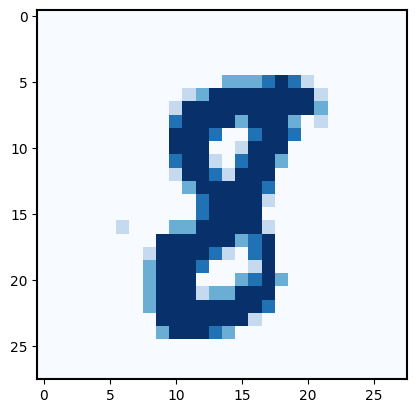

In [29]:

a_pic, a_label = get_picture()
print(f"Label: {a_label}")
plt.imshow(a_pic, cmap=sns.color_palette("Blues", as_cmap=True))


Label: 1


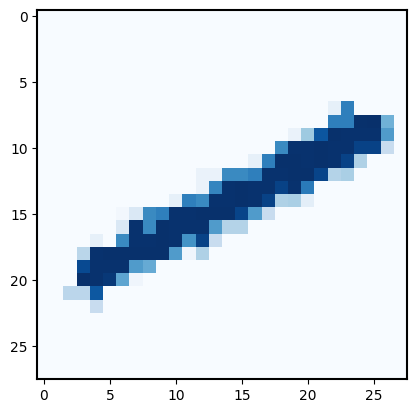

In [32]:

a_meta_pic, a_meta_label = get_meta_picture()
print(f"Label: {a_meta_label}")
plt.imshow(a_meta_pic, cmap=sns.color_palette("Blues", as_cmap=True))

# Transform a picture

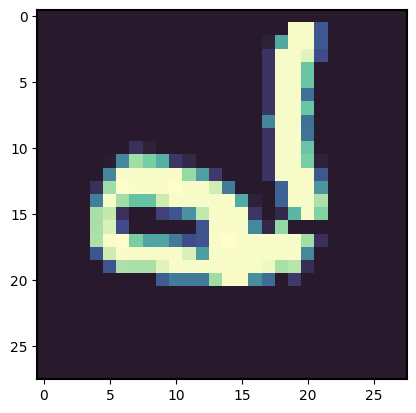

In [22]:
import numpy as np


theta = np.radians(270)  # rotate 180 degrees
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])

# some steps to create coordinate matrix
x_len, y_len = a_pic.shape
x_range = np.arange(x_len)
y_range = np.arange(y_len)
x_coords, y_coords = np.meshgrid(x_range, y_range)

coordinates = np.vstack([x_coords.flatten(), y_coords.flatten()])
# example for coordniates for image with shape n x n like:
# x: x0, x1, x2,  ... xn-2, xn-1, xn
# y: y0, y1, y2,  ... yn-2, yn-1, yn

# here we apply matrix multiplication
rotated_coordinates = rot_matrix @ coordinates
rotated_coordinates = rotated_coordinates.astype(int)

rotated_image = np.zeros(a_pic.shape)
# This might generate missing values that need to be interpolated! Will be skipped here
rotated_image[rotated_coordinates[0], rotated_coordinates[1]] = a_pic.flatten()
plt.imshow(rotated_image)

In [23]:
import PIL
import PIL.Image


a_p.getdata()

NameError: name 'a_p' is not defined

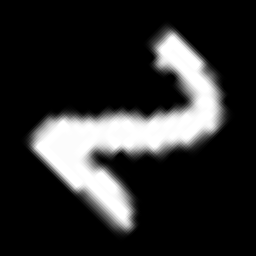

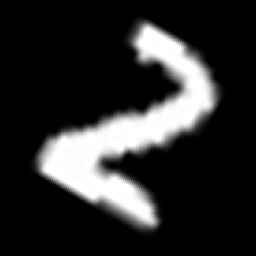

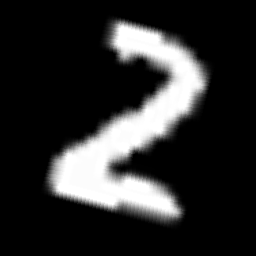

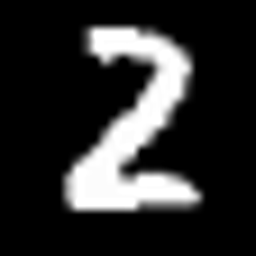

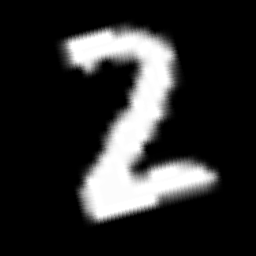

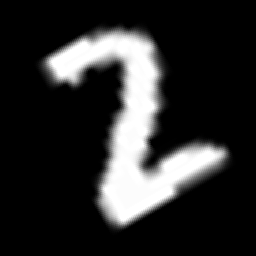

In [ ]:
for angle in range(-45, 45, 15):
    a_p.resize((256, 256)).rotate(angle).show()

In [ ]:
sum(np.array(a_p) == a_pic)

array([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28])